## Simulating Customer data

The art event does not have accurate data when it comes to who brought which wine at the event. The goal here is to simulate data around customer behavior when it comes to purchasing glasses of wine. With the simulatied data we can then test different approaches to the problem to see what works and what potentially doesn't. Once a method has been established, we can then work on a solution for the company's data maturity.

We have impartial information at hand, however,  we can glean from it to formulate the parameters around our simulation. This won't be accurate to the T, but it will be better than having no data at all.

What we know thus far is the amount of each type of wine bought for each event. We also have the total expense and the cost of each bottle.
The second piece of information we have, is the amount of customers that came to the event

The first event had 36 people, the second had 52, and the third had 71 

In [1]:
import polars as pl
import numpy as np
import names
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Wines list
wine_data = [
    {'id': 1, 'brand': 'Langhe Nebbiolo Rosa dell Olmo 2021', 'size -ml': 750, 'type': 'red', 'cost': 8.99},
    {'id': 2, 'brand': 'Motif Cabernet Sauvignon Red Hill', 'size -ml': 750, 'type': 'red', 'cost': 4.99},
    {'id': 3, 'brand': 'Prosecco', 'size -ml': 750, 'type': 'sparkling', 'cost': 8.99},
    {'id': 4, 'brand': 'Prosecco', 'size -ml': 750, 'type': 'sparkling', 'cost': 8.99},
    {'id': 6, 'brand': 'Giardino Pinot Grigio', 'size -ml': 1500, 'type': 'white', 'cost': 14.99},
    {'id': 7, 'brand': 'Honey Moon', 'size -ml': 750, 'type': 'white', 'cost': 5.49}
    
]

df_wine = pl.DataFrame(wine_data)
df_wine

id,brand,size -ml,type,cost
i64,str,i64,str,f64
1,"""Langhe Nebbiolo Rosa dell Olmo…",750,"""red""",8.99
2,"""Motif Cabernet Sauvignon Red H…",750,"""red""",4.99
3,"""Prosecco""",750,"""sparkling""",8.99
4,"""Prosecco""",750,"""sparkling""",8.99
6,"""Giardino Pinot Grigio""",1500,"""white""",14.99
7,"""Honey Moon""",750,"""white""",5.49


## Asumptions

At the first event, the wine was free, so we will assume that on average people had around 3 drinks the whole night. At the second and third events, the cost of a drink was $10 and on average people had 2 drinks the whole night.

The first event in terms of what people drank, because it was free, the distribution was relatively uniform.

The second event took place in the early summer and folks favored the white and sparkling wine over the red.

The third event, which was held in November, the red wine was favored more over the white.

Text(0.5, 0.98, 'Drink Count per Attendee')

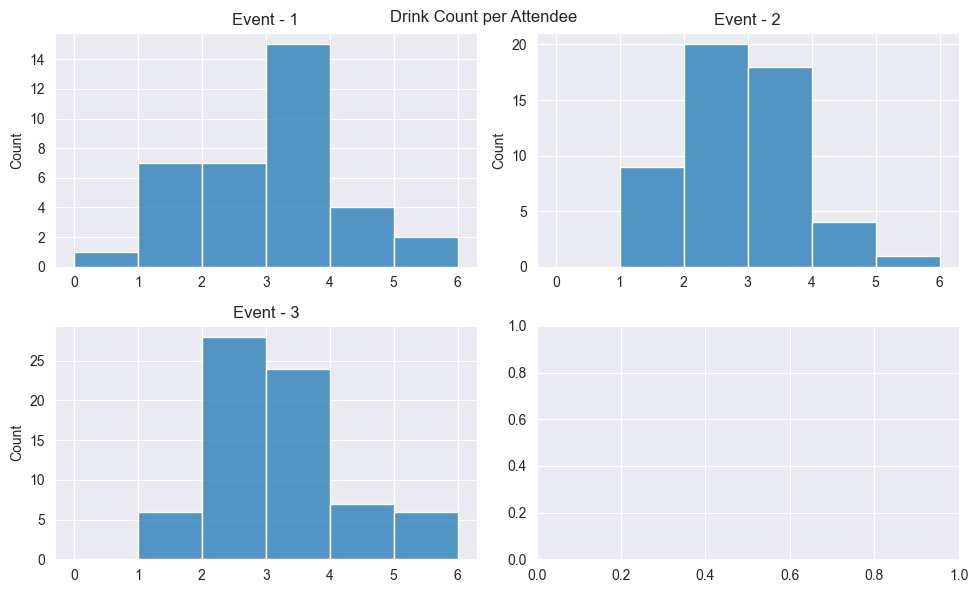

In [4]:
# generate the random aggregated amount of wine each person bought at the event.
event_drinks = [0, 1, 2, 3, 4, 5, 6]
event_1_probs = [0.03, 0.12, 0.22, 0.43, 0.15, 0.039999999999999925, 0.01]

event_2_probs = [0.02, 0.15, 0.45, 0.24, 0.08, 0.050000000000000027, 0.01]

event_3_probs = [0.03, 0.11, 0.37, 0.33, 0.11, 0.03, 0.019999999999999907]

event1_num = 36
event2_num = 52
event3_num = 71
# generate a list of random names
attendees_first_name = [names.get_first_name(gender='female') for _ in range(20)] + [names.get_first_name(gender='male') for _ in range(16)]
attendees_last_name = [names.get_last_name() for _ in range(36)]

attendees_first_name2 = [names.get_first_name(gender='female') for _ in range(30)] + [names.get_first_name(gender='male') for _ in range(22)]
attendees_last_name2 = [names.get_last_name() for _ in range(52)]

attendees_first_name3 = [names.get_first_name(gender='female') for _ in range(40)] + [names.get_first_name(gender='male') for _ in range(31)]
attendees_last_name3 = [names.get_last_name() for _ in range(71)]

# genertate the random drinks each person had at the event
event_1_drink_counts = np.random.choice(event_drinks, event1_num, p=event_1_probs)
event_2_drink_counts = np.random.choice(event_drinks, event2_num, p=event_2_probs)
event_3_drink_counts = np.random.choice(event_drinks, event3_num, p=event_3_probs)

fig, axes = plt.subplots(2, 2, figsize=(10,6))
axes = axes.flatten()

counter = 0
for event in [event_1_drink_counts, event_2_drink_counts, event_3_drink_counts]:
    sns.histplot(event, bins=event_drinks,  ax=axes[counter]).set_title(f"Event - {counter + 1}")
    counter += 1

fig.tight_layout()
fig.suptitle('Drink Count per Attendee')


In [5]:
# create a polars data frame of the drink counts from the event

df_drink_counts = pl.DataFrame({
    'First Name': attendees_first_name,
    'Last Name': attendees_last_name,
    'Drink Count': event_1_drink_counts,
    'event number': [1 for _ in range(event1_num)]
})

df_drink_counts2 = pl.DataFrame({
    'First Name': attendees_first_name2,
    'Last Name': attendees_last_name2,
    'Drink Count': event_2_drink_counts,
    'event number': [2 for _ in range(event2_num)]
})

df_drink_counts3 = pl.DataFrame({
    'First Name': attendees_first_name3,
    'Last Name': attendees_last_name3,
    'Drink Count': event_3_drink_counts,
    'event number': [3 for _ in range(event3_num)]
})

# concat the three dataframe
df_drink_counts = pl.concat([df_drink_counts, df_drink_counts2, df_drink_counts3])
df_drink_counts.head()

First Name,Drink Count,event number
str,i64,i64
"""Belinda""",4,1
"""Kay""",2,1
"""Ronnie""",4,1
"""Lauren""",3,1
"""Helen""",3,1


In [25]:
wine_ids = [1, 2, 3, 4, 5, 6, 7]
wine_1_probs = [0.099999999999999907, 0.18, 0.12, 0.13, 0.15, 0.14, 0.180000000000000009]
wine_2_probs = [0.099999999999999907, 0.07, 0.18, 0.13, 0.200000000000000009, 0.14, 0.180000000000000009]
wine_3_probs = [0.34, 0.31, 0.05, 0.09, 0.01, 0.11, 0.09]

# get the total amount of drinks ordered on each event
order_count = int(event_1_drink_counts.sum())
order_count2 = int(event_2_drink_counts.sum())
order_count3 = int(event_3_drink_counts.sum())

# genertate the random drinks each person had at the event
event_1_drink_counts = np.random.choice(wine_ids, order_count, p=wine_1_probs)
event_2_drink_counts = np.random.choice(wine_ids, order_count2, p=wine_2_probs)
event_3_drink_counts = np.random.choice(wine_ids, order_count3, p=wine_3_probs)

# create the dataframes
df_wine_orders


0.0
0.0
0.0


order_date,id,event number,order_id,brand,type
datetime[μs],i64,i64,i64,str,str
2023-11-16 09:00:00,7,1,0,"""Honey Moon""","""white"""
2023-11-16 09:01:00,7,1,1,"""Honey Moon""","""white"""
2023-11-16 09:02:00,5,1,2,null,null
2023-11-16 09:03:00,2,1,3,"""Motif Cabernet Sauvignon Red H…","""red"""
2023-11-16 09:04:00,1,1,4,"""Langhe Nebbiolo Rosa dell Olmo…","""red"""


[]